# Set up

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
import math
import numpy as np
from datetime import timedelta

# Classification
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Plotting 
from mlxtend.plotting import plot_learning_curves
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Prepare Data

In [0]:
header=['timestamp','rssi1','rssi2','rssi3']
df = pd.read_csv('/beacon/beaconexport.csv',names=header,skiprows=1,usecols=[1,2,3,4])
df.head()

,timestamp,rssi1,rssi2,rssi3
0,1548657361362,-83,-83,-95
1,1548657362479,-83,-81,-93
2,1548657365848,-77,-86,-96
3,1548657366962,-83,-82,-89
4,1548657368092,-80,-89,-90


In [0]:
header=['block','lastid','x','y']
train = pd.read_csv('/beacon/traindatacollect.csv',names=header,skiprows=1,usecols=[0,1,4,5])
train = train.dropna()
train['lastid'] = train.lastid.astype(int)
train.head()

,block,lastid,x,y
0,1,1548657400588,1.05,16.80
1,2,1548657451207,2.10,16.80
2,3,1548657485046,2.10,17.85
3,4,1548657801766,3.15,16.80
4,5,1548657849829,3.15,17.85


In [0]:
data = []
data_block = []
timestamp = 0
for index,row in train.iterrows():
  time = row['lastid']
  rowx = row['x']
  rowy = row['y']
  block = row['block']
  for index2,row2 in df.iterrows():
    if timestamp < row2['timestamp'] <= time:
      row2['x'] = rowx
      row2['y'] = rowy
      row2['block'] = block
      data_block.append(row2)
      data.append(row2)
  data_block = []
  timestamp = time
alldata = pd.DataFrame(data)


In [0]:
alldata['rssi1'] = alldata.rssi1.astype(int)
alldata['rssi2'] = alldata.rssi2.astype(int)
alldata['rssi3'] = alldata.rssi3.astype(int)
alldata['block'] = alldata.block.astype(int)

In [0]:
alldata['timestamp'] = pd.to_datetime(alldata['timestamp'], unit='ms') + timedelta(hours=7)
alldata

,timestamp,rssi1,rssi2,rssi3,x,y,block
0,2019-01-28 13:36:01.362,-83,-83,-95,1.05,16.80,1
1,2019-01-28 13:36:02.479,-83,-81,-93,1.05,16.80,1
2,2019-01-28 13:36:05.848,-77,-86,-96,1.05,16.80,1
3,2019-01-28 13:36:06.962,-83,-82,-89,1.05,16.80,1
4,2019-01-28 13:36:08.092,-80,-89,-90,1.05,16.80,1
5,2019-01-28 13:36:09.218,-78,-84,-91,1.05,16.80,1
6,2019-01-28 13:36:10.345,-76,-85,-91,1.05,16.80,1
7,2019-01-28 13:36:11.459,-79,-85,-91,1.05,16.80,1
8,2019-01-28 13:36:14.845,-83,-87,-94,1.05,16.80,1
9,2019-01-28 13:36:24.919,-75,-88,-90,1.05,16.80,1


In [0]:
alldata.to_csv('/beacon/data.csv', sep=',')

# Train Test

In [0]:
rssi_data = pd.read_csv('/beacon/data.csv',index_col=0)
rssi_data.head(20)

,timestamp,rssi1,rssi2,rssi3,x,y,block
0,2019-01-28 13:36:01.362,-83,-83,-95,1.05,16.8,1
1,2019-01-28 13:36:02.479,-83,-81,-93,1.05,16.8,1
2,2019-01-28 13:36:05.848,-77,-86,-96,1.05,16.8,1
3,2019-01-28 13:36:06.962,-83,-82,-89,1.05,16.8,1
4,2019-01-28 13:36:08.092,-80,-89,-90,1.05,16.8,1
5,2019-01-28 13:36:09.218,-78,-84,-91,1.05,16.8,1
6,2019-01-28 13:36:10.345,-76,-85,-91,1.05,16.8,1
7,2019-01-28 13:36:11.459,-79,-85,-91,1.05,16.8,1
8,2019-01-28 13:36:14.845,-83,-87,-94,1.05,16.8,1
9,2019-01-28 13:36:24.919,-75,-88,-90,1.05,16.8,1


In [0]:
#Information about the data variables in dataset
rssi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213 entries, 0 to 3212
Data columns (total 7 columns):
timestamp    3213 non-null object
rssi1        3213 non-null int64
rssi2        3213 non-null int64
rssi3        3213 non-null int64
x            3213 non-null float64
y            3213 non-null float64
block        3213 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 200.8+ KB


In [0]:
#description of labled data including count, mean, std,min,max,median, 1st and 2nd quartiles.
rssi_data[['rssi1','rssi2','rssi3']].describe()

,rssi1,rssi2,rssi3
count,3213.000000,3213.000000,3213.000000
mean,-86.993464,-79.688453,-86.333333
std,9.149391,9.004343,8.411098
min,-102.000000,-100.000000,-101.000000
25%,-94.000000,-86.000000,-93.000000
50%,-89.000000,-81.000000,-88.000000
75%,-83.000000,-74.000000,-82.000000
max,-52.000000,-49.000000,-52.000000


In [0]:
locations = rssi_data['block'][:] #The output variable, location, isolated from labled dataframe
dates = rssi_data['timestamp'][:]##The object type input variable, date, isolated from labled dataframe
features = rssi_data.drop(['timestamp','block','x','y'], axis = 1)#64int iBeacon RSSI valued variables for data processing

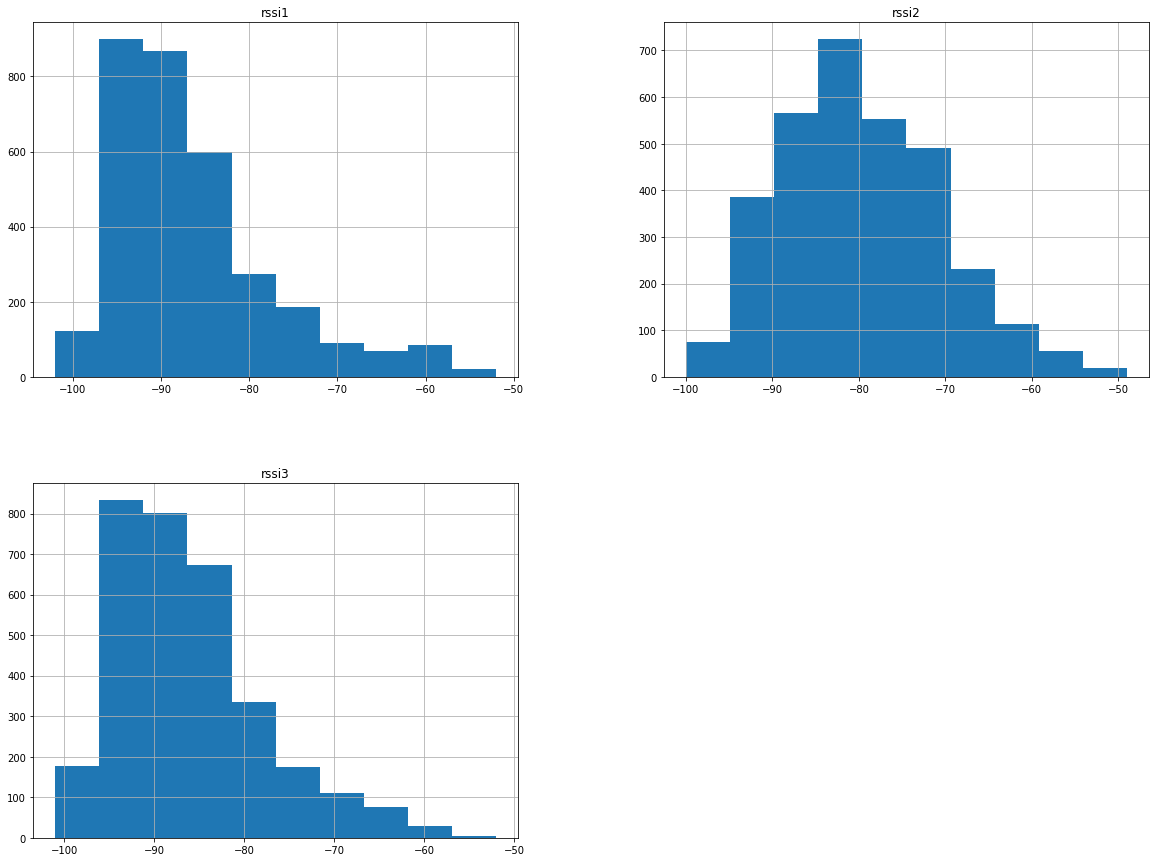

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt 
features.hist(figsize=(20,15))# Plotting all the beacons values 
#x axis = RSSI value
#y axis = number of data points at a perticular RSSI value
plt.savefig('Leabeled_beacons_HIstograms.png')
plt.show()

In [0]:
features.corr()

,rssi1,rssi2,rssi3
rssi1,1.000000,-0.238992,-0.213926
rssi2,-0.238992,1.000000,-0.252627
rssi3,-0.213926,-0.252627,1.000000


In [0]:
from sklearn.model_selection import train_test_split
X = features
y = locations
#Deviding data into train, and test
#X_train1, X_test, y_train1, y_test indicates only train and test data groups
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2, random_state =1, stratify=y)

In [0]:
#The lengths of test, validation and test datasets
print('Length of X_train, y_train:',len(X_train))
print('Length of X_test,y_test     :',len(X_test))


Length of X_train, y_train: 2570
Length of X_test,y_test     : 643
Length of X_train1, y_train1  : 2056
Length of X_val, y_val      : 514


# Random forest

In [0]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', 
                            max_leaf_nodes=None,min_impurity_split=1e-07, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0, 
                            n_estimators=700, n_jobs=1, oob_score=False, random_state=1,verbose=0, warm_start=False)
rf.fit(X_train,y_train)
pred_test = rf.predict(X_test)


print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_test, pred_test)))

Prediction accuracy for the test dataset
19.28%


In [0]:
for i in range(0,len(y_test)):
  if list(y_test)[i] == 1:
    print('Random forest - Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_test)[i],pred_test[i]))

Random forest - Actual outcome :: 1 and Predicted outcome :: 4
Random forest - Actual outcome :: 1 and Predicted outcome :: 10
Random forest - Actual outcome :: 1 and Predicted outcome :: 28


In [0]:
for i in range(0, 10):
  print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_test)[i],pred_test[i]))

Actual outcome :: 31 and Predicted outcome :: 47
Actual outcome :: 87 and Predicted outcome :: 81
Actual outcome :: 13 and Predicted outcome :: 13
Actual outcome :: 126 and Predicted outcome :: 125
Actual outcome :: 178 and Predicted outcome :: 166
Actual outcome :: 132 and Predicted outcome :: 66
Actual outcome :: 72 and Predicted outcome :: 137
Actual outcome :: 70 and Predicted outcome :: 64
Actual outcome :: 112 and Predicted outcome :: 107
Actual outcome :: 39 and Predicted outcome :: 49


In [0]:
print ('Train Accuracy :: ', accuracy_score(y_train, rf.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_test, pred_test))

Train Accuracy ::  0.9303501945525292
Test Accuracy  ::  0.19284603421461896


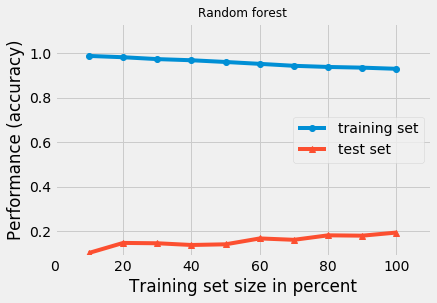

In [0]:
plot_learning_curves(X_train, y_train,
                     X_test, y_test,
                     rf, scoring = 'accuracy',
                     print_model = False)
plt.title('Random forest')
plt.show()

In [0]:
#average error
y = list(y_test)
alldistance = 0
N = len(pred_test)
for i in range(0, N):
    #print(i)
    if (y[i] == pred_test[i]):
        alldistance += 0
    else:
        #print("1")
        ydf = rssi_data[rssi_data['block'] == y[i]]
        predf = rssi_data[rssi_data['block'] == pred_test[i]]     
        lgn = list(ydf['x'])[0]-list(predf['x'])[0]
        lt  = list(ydf['y'])[0]-list(predf['y'])[0]
        distance = np.sqrt(lgn**2 + lt**2)
        alldistance += distance

d_avg = alldistance/N
print(d_avg)

4.703371451108898


# KNN

In [0]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
pred_test_knn = knn.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_knn)))

Prediction accuracy for the test dataset
19.91%


In [0]:
for i in range(0,len(y_test)):
  if list(y_test)[i] == 1:
     print('KNN - Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_test)[i],pred_test_knn[i]))

KNN - Actual outcome :: 1 and Predicted outcome :: 9
KNN - Actual outcome :: 1 and Predicted outcome :: 9
KNN - Actual outcome :: 1 and Predicted outcome :: 28


In [0]:
for i in range(0, 10):
  print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_test)[i],pred_test_knn[i]))

Actual outcome :: 31 and Predicted outcome :: 31
Actual outcome :: 87 and Predicted outcome :: 81
Actual outcome :: 13 and Predicted outcome :: 13
Actual outcome :: 126 and Predicted outcome :: 43
Actual outcome :: 178 and Predicted outcome :: 166
Actual outcome :: 132 and Predicted outcome :: 66
Actual outcome :: 72 and Predicted outcome :: 132
Actual outcome :: 70 and Predicted outcome :: 56
Actual outcome :: 112 and Predicted outcome :: 111
Actual outcome :: 39 and Predicted outcome :: 49


In [0]:
print ('Train Accuracy :: ', accuracy_score(y_train, knn.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_test, pred_test_knn))

Train Accuracy ::  0.34747081712062255
Test Accuracy  ::  0.19906687402799378


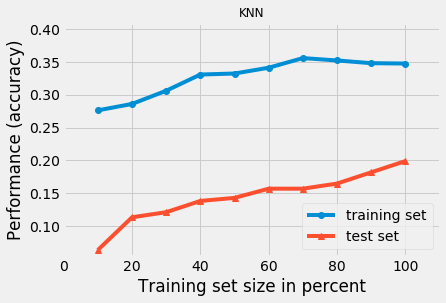

In [0]:
plot_learning_curves(X_train, y_train,
                     X_test, y_test,
                     knn, scoring = 'accuracy',
                     print_model = False)
plt.title('KNN')
plt.show()

In [0]:
y = list(y_test)
alldistance = 0
N = len(pred_test_knn)
for i in range(0, N):
    #print(i)
    if (y[i] == pred_test_knn[i]):
        alldistance += 0
    else:
        #print("1")
        ydf = rssi_data[rssi_data['block'] == y[i]]
        predf = rssi_data[rssi_data['block'] == pred_test_knn[i]]
        lgn = list(ydf['x'])[0]-list(predf['x'])[0]
        lt  = list(ydf['y'])[0]-list(predf['y'])[0]
        distance = np.sqrt(lgn**2 + lt**2)
        alldistance += distance

d_avg = alldistance/N
print(d_avg)

5.043465698958329


# Support Vector Classification

In [0]:
svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovo', degree=3,
          gamma=0.1, kernel='rbf',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)
svc.fit(X_train, y_train)
pred_test_svc = svc.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_svc)))


Prediction accuracy for the test dataset
21.62%


In [0]:
for i in range(0,len(y_test)):
  if list(y_test)[i] == 1:
     print('SVC - Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_test)[i],pred_test_svc[i]))

SVC - Actual outcome :: 1 and Predicted outcome :: 9
SVC - Actual outcome :: 1 and Predicted outcome :: 9
SVC - Actual outcome :: 1 and Predicted outcome :: 28


In [0]:
rows_list = []
for i in range(0, 10):
  print('Actual outcome :: {0} and Predicted outcome :: {1}'.format(list(y_test)[i],pred_test_svc[i]))

Actual outcome :: 31 and Predicted outcome :: 49
Actual outcome :: 87 and Predicted outcome :: 87
Actual outcome :: 13 and Predicted outcome :: 13
Actual outcome :: 126 and Predicted outcome :: 125
Actual outcome :: 178 and Predicted outcome :: 166
Actual outcome :: 132 and Predicted outcome :: 53
Actual outcome :: 72 and Predicted outcome :: 72
Actual outcome :: 70 and Predicted outcome :: 56
Actual outcome :: 112 and Predicted outcome :: 111
Actual outcome :: 39 and Predicted outcome :: 49


In [0]:
print ('Train Accuracy :: ', accuracy_score(y_train, svc.predict(X_train)))
print ('Test Accuracy  :: ', accuracy_score(y_test, pred_test_svc))

Train Accuracy ::  0.47821011673151753
Test Accuracy  ::  0.2161741835147745


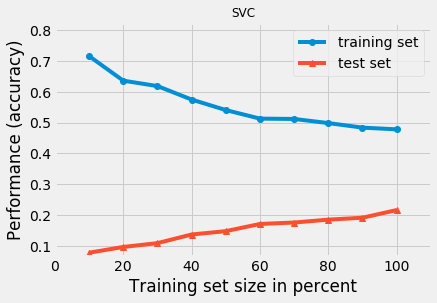

In [0]:
plot_learning_curves(X_train, y_train,
                     X_test, y_test,
                     svc, scoring = 'accuracy',
                     print_model = False)
plt.title('SVC')
plt.show()

In [0]:
y = list(y_test)
alldistance = 0
N = len(pred_test_svc)
for i in range(0, N):
    #print(i)
    if (y[i] == pred_test_svc[i]):
        alldistance += 0
    else:
        #print("1")
        ydf = rssi_data[rssi_data['block'] == y[i]]
        predf = rssi_data[rssi_data['block'] == pred_test_svc[i]]
        lgn = list(ydf['x'])[0]-list(predf['x'])[0]
        lt  = list(ydf['y'])[0]-list(predf['y'])[0]
        distance = np.sqrt(lgn**2 + lt**2)
        alldistance += distance

d_avg = alldistance/N
print(d_avg)

4.451861640401095


In [0]:
rows_list = []
for i in range(0, 10):
  dd = "dict"+ str(i)
  dd ={}
  dd.update({'Actual' : list(y_test)[i],'RF' :pred_test[i] , 'KNN':pred_test_knn[i] ,'SVC':pred_test_svc[i] })
  rows_list.append(dd)

df = pd.DataFrame(rows_list)
df

,Actual,KNN,RF,SVC
0,31,31,47,49
1,87,81,81,87
2,13,13,13,13
3,126,43,125,125
4,178,166,166,166
5,132,66,66,53
6,72,132,137,72
7,70,56,64,56
8,112,111,107,111
9,39,49,49,49


# Trajectory

In [0]:
header=['timestamp','rssi1','rssi2','rssi3']
trajectory = pd.read_csv('/beacon/beacon_trajectory.csv',names=header,skiprows=1,usecols=[0,1,2,3])
trajectory.head()

,timestamp,rssi1,rssi2,rssi3
0,1552358042929,-58,-87,-94
1,1552358044042,-58,-85,-92
2,1552358046296,-55,-94,-87
3,1552358048556,-64,-84,-89
4,1552358055238,-82,-82,-89


In [0]:
header=['path','lastid']
path = pd.read_csv('/beacon/trajectory_path.csv',names=header,skiprows=1,usecols=[0,1])
path['lastid'] = path.lastid.astype(int)
path.head()

,path,lastid
0,1,1552358073104
1,2,1552358260188
2,3,1552358458320
3,4,1552359222508
4,5,1552359298452


In [0]:
data = []
data_block = []
timestamp = 0
for index,row in path.iterrows():
  time = row['lastid']
  path = row['path']
  for index2,row2 in trajectory.iterrows():
    if timestamp < row2['timestamp'] <= time:
      row2['path'] = path
      data_block.append(row2)
      data.append(row2)
  data_block = []
  timestamp = time
alldata = pd.DataFrame(data)


In [0]:
alldata.to_csv('/beacon/traj_path.csv', sep=',')

In [0]:
alldata = pd.read_csv('/beacon/traj_path.csv',index_col=0)
alldata.head()

,timestamp,rssi1,rssi2,rssi3,path
0,1552358042929,-58,-87,-94,1
1,1552358044042,-58,-85,-92,1
2,1552358046296,-55,-94,-87,1
3,1552358048556,-64,-84,-89,1
4,1552358055238,-82,-82,-89,1


In [0]:
test = alldata[['rssi1','rssi2','rssi3']]
test_path = alldata['path']

In [0]:
test_svc = svc.predict(test)
test_knn = knn.predict(test)
test_rf = rf.predict(test)

In [0]:
actual = [21,27,33,37,48,55,62,86,147,152,157,174]
rows_list = []
for i in range(0, len(actual)):
  dd = "dict"+ str(i)
  dd ={}
  dd.update({'Actual' :actual[i],'Path' : test_path[i],'RF' :test_rf[i] , 'KNN':test_knn[i] ,'SVC':test_svc[i] })
  rows_list.append(dd)

df2 = pd.DataFrame(rows_list)
df2

,Actual,KNN,Path,RF,SVC
0,21,22,1,18,22
1,27,18,1,18,18
2,33,20,1,20,20
3,37,14,1,14,14
4,48,89,1,1,89
5,55,67,1,183,67
6,62,43,1,59,47
7,86,63,1,78,78
8,147,77,1,52,77
9,152,78,1,79,78


In [0]:
header=['block','lastid','x','y']
train = train.dropna()
train['lastid'] = train.lastid.astype(int)
train.head()

,block,lastid,x,y
0,1,1548657400588,1.05,16.80
1,2,1548657451207,2.10,16.80
2,3,1548657485046,2.10,17.85
3,4,1548657801766,3.15,16.80
4,5,1548657849829,3.15,17.85


In [0]:
data=[]
i=0
for index2,row2 in df2.iterrows():
    actual = row2['Actual']
    knn = row2['KNN']
    svc = row2['SVC']
    rf = row2['RF']
    for index,row in train.iterrows():
      block = row['block'].astype(int)
      x = row['x']
      y = row['y']  
      if block == actual:
        row2['actual_x'] = x
        row2['actual_y'] = y
        i+=1
      if block == knn:
        row2['knn_x'] = x
        row2['knn_y'] = y
        i+=1
      if block == svc:
        row2['svc_x'] = x
        row2['svc_y'] = y
        i+=1
      if block == rf:
        row2['rf_x'] = x
        row2['rf_y'] = y
        i+=1
      if i == 4:
        data.append(row2)
        i=0
  
    
plot_data = pd.DataFrame(data)


In [0]:
plot_data.head()

,Actual,KNN,Path,RF,SVC,rf_x,rf_y,actual_x,actual_y,knn_x,knn_y,svc_x,svc_y
0,21.0,22.0,1.0,18.0,22.0,10.50,16.8,11.55,17.85,12.60,16.8,12.60,16.8
1,27.0,18.0,1.0,18.0,18.0,10.50,16.8,14.70,17.85,10.50,16.8,10.50,16.8
2,33.0,20.0,1.0,20.0,20.0,11.55,16.8,17.85,17.85,11.55,16.8,11.55,16.8
3,37.0,14.0,1.0,14.0,14.0,8.40,16.8,19.95,17.85,8.40,16.8,8.40,16.8
4,48.0,89.0,1.0,1.0,89.0,1.05,16.8,22.05,17.85,27.30,21.0,27.30,21.0


(0, 40)

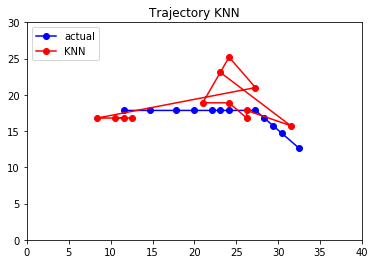

In [0]:

plt.title('Trajectory KNN')
plt.plot(plot_data['actual_x'],plot_data['actual_y'], '-bo',label='actual')
plt.plot(plot_data['knn_x'],plot_data['knn_y'], '-ro',label='KNN')
plt.legend(loc='upper left')
plt.ylim(0,30)
plt.xlim(0,40)

(0, 45)

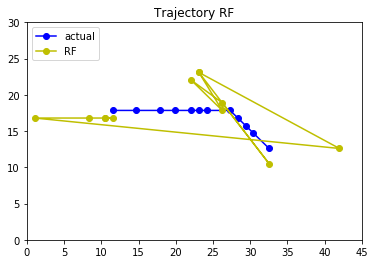

In [0]:
plt.title('Trajectory RF')
plt.plot(plot_data['actual_x'],plot_data['actual_y'], '-bo',label='actual')
plt.plot(plot_data['rf_x'],plot_data['rf_y'], '-yo',label='RF')
plt.legend(loc='upper left')
plt.ylim(0,30)
plt.xlim(0,45)

(0, 40)

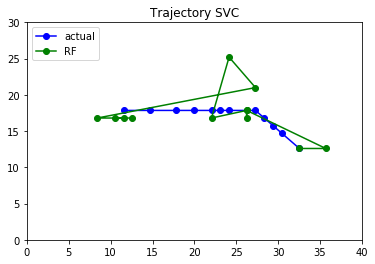

In [0]:
plt.title('Trajectory SVC')
plt.plot(plot_data['actual_x'],plot_data['actual_y'], '-bo',label='actual')
plt.plot(plot_data['svc_x'],plot_data['svc_y'], '-go',label='RF')
plt.legend(loc='upper left')
plt.ylim(0,30)
plt.xlim(0,40)